In [92]:
from cryodrgn import mrc
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np

In [93]:
stack, _ = mrc.parse_mrc('red_FoilHole_14605850_Data_14581335_14581337_20191214_140730_Fractions_602_0.mrc')
image = stack[0]
image.shape

(4096, 4096)

In [94]:
x_dim = image.shape[0]
y_dim = image.shape[1]
print('image dimensions: ' +str(stack.shape[1])+'x'+str(stack.shape[1])+' pixels')
ang_px = 0.6
scale_a = 100.0
scale_b = 400
line_a = scale_a/ang_px
line_b = scale_b/ang_px
offset = x_dim/20

image dimensions: 4096x4096 pixels


(-0.5, 4095.5, 4095.5, -0.5)

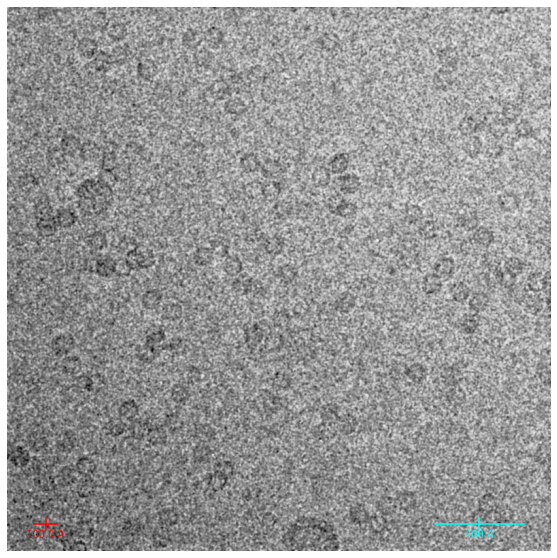

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
im_blur = ndimage.gaussian_filter(image, 6)
axes.imshow(im_blur, cmap='Greys_r')
axes.plot(np.array([offset,offset+line_a]), np.array([y_dim-offset, y_dim-offset]), color='red')
axes.plot(np.array([(offset*2+line_a)/2.0,(offset*2+line_a)/2.0]), np.array([y_dim-offset-y_dim/100, y_dim-offset+y_dim/100]), color='red')
axes.text((2*offset+line_a)/2, y_dim-offset+y_dim/50, str(scale_a)+' A',color='r', ha='center', va='center')

axes.plot(np.array([x_dim-offset,x_dim-offset-line_b]), np.array([y_dim-offset, y_dim-offset]), color='cyan')
axes.plot(np.array([(2*x_dim-2*offset-line_b)/2.0,(2*x_dim-2*offset-line_b)/2.0]), np.array([y_dim-offset-y_dim/100, y_dim-offset+y_dim/100]), color='cyan')
axes.text((2*x_dim-2*offset-line_b)/2.0, y_dim-offset+y_dim/50, str(scale_b)+' A',color='cyan', ha='center', va='center')

axes.axis('off')